# Two-qubit Hamiltonian representing H2 at its equilibrium distance

The ground state energy of the following two-qubit Hamiltonian representing molecular $H_2$ at its equilibrium distance is to be found. The fermionic operators are already mapped onto qubits here.

```
h2_hamiltonian = (-1.0523732)  II + 
                 (0.39793742)  IZ + 
                 (-0.3979374)  ZI + 
                 (-0.0112801)  ZZ + 
                 (0.18093119)  XX
```
                
These co-efficients are functions of the interatomic distance between the atoms. A term like `IZ` is shorthand notation for a tensor product of two-qubit operators -- the identity operator ($I$) on one qubit and pauli-Z operator ($Z$) on the other qubit.

# Hardware efficient trial states

We need to prepare a guess for the ground state of this Hamiltonian. For this exercise, we will construct a hardware efficient trial state of depth `d=2`, with CNOT (`CX`) gates for the entanglers. We will interleave each entangling layer with a set of $R_yR_z$ gates on each qubit (total 4 layers). For the first guess, we will use rotation angles of $\pi/2$ on all the $R_y$ and $R_z$ gates.

In [1]:
import numpy as np
pi = np.pi
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

In [2]:
def prepare_hets_circuit(depth, angle1, angle2):

    hets_circ = QuantumCircuit(depth)
    hets_circ.ry(angle1, 0)
    hets_circ.rz(angle1, 0)
    hets_circ.ry(angle1, 1)
    hets_circ.rz(angle1, 1)

    for ii in range(depth):
        hets_circ.cx(0,1)
        hets_circ.ry(angle2,0)
        hets_circ.rz(angle2,0)
        hets_circ.ry(angle2,1)
        hets_circ.rz(angle2,1)
    
    return hets_circ 

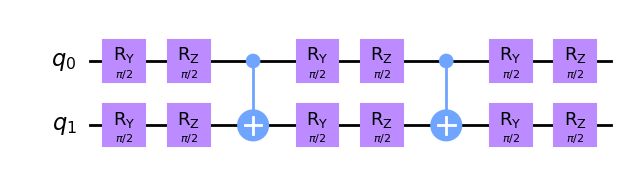

In [3]:
hets_circuit = prepare_hets_circuit(2, pi/2, pi/2)
hets_circuit.draw(output='mpl')

# Measuring expectation values

Next, we measure expectation values. **We will begin by measuring the ZZ expectation value, or $\langle ZZ \rangle$**. We will first create a copy of the `hets_circ` quantum circuit that we created above, and add measurements to it.

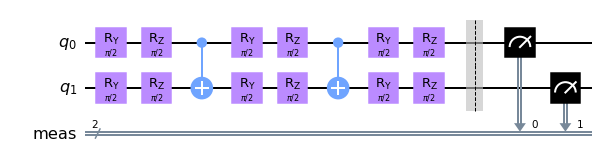

In [19]:
def measure_zz_circuit(given_circuit):
    zz_meas = given_circuit.copy()
    zz_meas.measure_all()
    return zz_meas

zz_meas = measure_zz_circuit(hets_circuit)
zz_meas.draw(output='mpl')

Next, let's execute this quantum circuit and see the measurement outcomes.

In [5]:
simulator = Aer.get_backend('qasm_simulator')

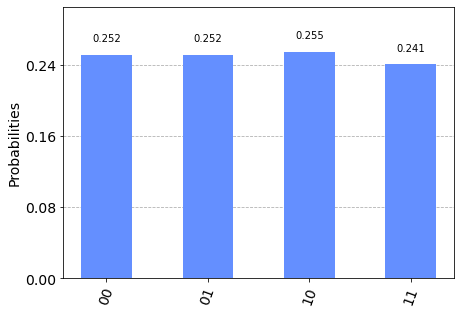

In [6]:
result = execute(zz_meas, backend = simulator, shots=10000).result()
counts = result.get_counts(zz_meas)

plot_histogram(counts)

## Analyzing counts

In [7]:
def measure_zz(given_circuit, num_shots = 10000):

    zz_meas = measure_zz_circuit(given_circuit)
    
    result = execute(zz_meas, backend = simulator, shots = num_shots).result()
    counts = result.get_counts(zz_meas)

    if '00' not in counts:
        counts['00'] = 0
    if '01' not in counts:
        counts['01'] = 0
    if '10' not in counts:
        counts['10'] = 0
    if '11' not in counts:
        counts['11'] = 0 

    total_counts = counts['00'] + counts['11'] + counts['01'] + counts['10']
    zz = counts['00'] + counts['11'] - counts['01'] - counts['10']
    zz = zz / total_counts
    
    return zz

In [8]:
zz = measure_zz(hets_circuit)
print("<ZZ> =", str(zz))

<ZZ> = 0.011


In [9]:
def measure_zi(given_circuit, num_shots = 10000):
    
    zz_meas = measure_zz_circuit(given_circuit)
    
    result = execute(zz_meas, backend = simulator, shots = num_shots).result()
    counts = result.get_counts(zz_meas)

    if '00' not in counts:
        counts['00'] = 0
    if '01' not in counts:
        counts['01'] = 0
    if '10' not in counts:
        counts['10'] = 0
    if '11' not in counts:
        counts['11'] = 0 

    total_counts = counts['00'] + counts['11'] + counts['01'] + counts['10']
    
    zi = counts['00'] - counts['11'] + counts['01'] - counts['10']
    zi = zi / total_counts
    
    return zi

def measure_iz(given_circuit, num_shots = 10000):
    
    zz_meas = measure_zz_circuit(given_circuit)
    
    result = execute(zz_meas, backend = simulator, shots = num_shots).result()
    counts = result.get_counts(zz_meas)

    if '00' not in counts:
        counts['00'] = 0
    if '01' not in counts:
        counts['01'] = 0
    if '10' not in counts:
        counts['10'] = 0
    if '11' not in counts:
        counts['11'] = 0 

    total_counts = counts['00'] + counts['11'] + counts['01'] + counts['10']
    
    iz = counts['00'] - counts['11'] - counts['01'] + counts['10']
    iz = iz / total_counts
    
    return iz

In [10]:
zi = measure_zi(hets_circuit)
print("<ZI> =", str(zi))

iz = measure_iz(hets_circuit)
print("<IZ> =", str(iz))

<ZI> = -0.0212
<IZ> = -0.0048


In [11]:
def measure_xx_circuit(given_circuit):
    xx_meas = given_circuit.copy()
    
    xx_meas.h(0)
    xx_meas.h(1)
    xx_meas.measure_all()
    

    return xx_meas

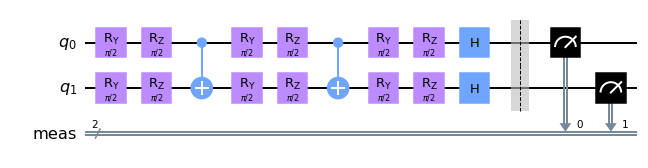

In [13]:
xx_meas = measure_xx_circuit(hets_circuit)
xx_meas.draw(output='mpl')

In [14]:
def measure_xx(given_circuit, num_shots = 10000):
    
    xx_meas = measure_xx_circuit(given_circuit)
    
    result = execute(xx_meas, backend = simulator, shots = num_shots).result()
    counts = result.get_counts(xx_meas)

    if '00' not in counts:
        counts['00'] = 0
    if '01' not in counts:
        counts['01'] = 0
    if '10' not in counts:
        counts['10'] = 0
    if '11' not in counts:
        counts['11'] = 0

    total_counts = counts['00'] + counts['11'] + counts['01'] + counts['10']
    xx = counts['00'] + counts['11'] - counts['01'] - counts['10']
    xx = xx / total_counts
    
    return xx

xx = measure_xx(hets_circuit)
print("<XX> =", str(xx))

<XX> = -1.0


### Evaluating Energy of the Trial State

In [15]:
def get_energy(given_circuit, num_shots = 10000):
    
    zz = measure_zz(given_circuit, num_shots = num_shots)
    iz = measure_iz(given_circuit, num_shots = num_shots)
    zi = measure_zi(given_circuit, num_shots = num_shots)
    xx = measure_xx(given_circuit, num_shots = num_shots)
    
    energy = (-1.0523732)*1 + (0.39793742)*iz + (-0.3979374)*zi + (-0.0112801)*zz + (0.18093119)*xx
    
    return energy

In [16]:
energy = get_energy(hets_circuit)
print("The energy of the trial state is", str(energy))

The energy of the trial state is -1.2406141559599997


# Computing gradients

The objective of the next set of exercises is to compute the next set of angles to use for the trial state preparation. Create two quantum circuits using `prepare_hets_circuit(depth=2, angle2 = pi/2)` for measuring expectation values with values for `angle1 = pi/2 + 0.1*pi/2` and `angle1 = pi/2 - 0.1*pi/2`, and measure the energy of both trial states.

In [17]:
hets_circuit_plus = None
hets_circuit_minus = None


hets_circuit_plus = prepare_hets_circuit(2, pi/2 + 0.1*pi/2, pi/2)
hets_circuit_minus = prepare_hets_circuit(2, pi/2 - 0.1*pi/2, pi/2)


energy_plus = get_energy(hets_circuit_plus, num_shots=100000)
energy_minus = get_energy(hets_circuit_minus, num_shots=100000)

print(energy_plus, energy_minus)

-1.1604693952974 -1.2785587293787999


In [18]:
energy_plus_100, energy_plus_1000, energy_plus_10000 = 0, 0, 0
energy_minus_100, energy_minus_1000, energy_minus_10000 = 0, 0, 0


energy_plus_100 = get_energy(hets_circuit_plus, num_shots = 100)
energy_minus_100 = get_energy(hets_circuit_minus, num_shots = 100)

energy_plus_1000 = get_energy(hets_circuit_plus, num_shots = 1000)
energy_minus_1000 = get_energy(hets_circuit_minus, num_shots = 1000)

energy_plus_10000 = get_energy(hets_circuit_plus, num_shots = 10000)
energy_minus_10000 = get_energy(hets_circuit_minus, num_shots = 10000)


print(energy_plus_100, energy_minus_100, "difference = ", energy_minus_100 - energy_plus_100)
print(energy_plus_1000, energy_minus_1000, "difference = ", energy_minus_1000 - energy_plus_1000)
print(energy_plus_10000, energy_minus_10000, "difference = ", energy_minus_10000 - energy_plus_10000)

-1.1869055135999997 -1.3070619213999997 difference =  -0.12015640779999992
-1.1359847067 -1.2641284282799998 difference =  -0.12814372157999987
-1.159466104584 -1.27479369088 difference =  -0.11532758629599993


## Obtaining Ground State Energy by Diagonalizing the Hamiltonian

In [19]:
I = np.array([
[1, 0],
[0, 1]
])

X = np.array([
[0, 1],
[1, 0]
])

Z = np.array([
[1, 0],
[0, -1]
])

h2_hamiltonian = (-1.0523732) * np.kron(I, I) + \
                 (0.39793742) * np.kron(I, Z) + \
                 (-0.3979374) * np.kron(Z, I) + \
                 (-0.0112801) * np.kron(Z, Z) + \
                 (0.18093119) * np.kron(X, X)

from numpy import linalg as LA
eigenvalues, eigenvectors = LA.eig(h2_hamiltonian)
for ii, eigenvalue in enumerate(eigenvalues):
    print(f"Eigenvector {eigenvectors[:,ii]} has energy {eigenvalue}")

exact_eigenvector = eigenvectors[:,np.argmin(eigenvalues)]
exact_eigenvalue = np.min(eigenvalues)

print()
print("Minimum energy is", exact_eigenvalue)

Eigenvector [0.70710682 0.         0.         0.70710674] has energy -0.8827221099999987
Eigenvector [ 0.70710674  0.          0.         -0.70710682] has energy -1.2445844900000007
Eigenvector [-2.07048005e-16 -9.93760401e-01  1.11535937e-01  8.23943737e-16] has energy -1.857274957569039
Eigenvector [5.61877442e-18 1.11535937e-01 9.93760401e-01 3.55011052e-17] has energy -0.22491124243096008

Minimum energy is -1.857274957569039
